In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
from tqdm import tqdm
import re

In [58]:
def getSoup(link):###vytvoříme funkci, která získá z URL adresy text
    sleep(0.05)
    r = requests.get(link)
    return BeautifulSoup(r.text,'lxml')

In [5]:
"""pokus"""

'pokus'

In [59]:
def getAllLinks(link):###najdeme tabulku linků
    soup = getSoup(link)
    table = soup.find('table', {'id':'reportable'})
    tds = table.findAll('td', {'align':'left'})
    a = [td.find('a') for td in tds]
    res = [i for i in a if i]
    return res

In [60]:
links = getAllLinks('http://tennisabstract.com/reports/atpRankings.html')###získáme všechny linky

In [61]:
b = [str(links[i])for i in range(len(links))]
c = [i.replace('"', '!') for i in b]
d = [o.split("!") for o in c]
flinks = [d[p][1] for p in range(len(d))]

In [62]:
Namesss = [flink.replace('http://www.tennisabstract.com/cgi-bin/player.cgi?p=', '') for flink in flinks]###získáme jména
Names=Namesss[:150]

In [63]:
finallist = []###udeláme list, ve kterém jsou listy z údaji jednotlivých hráčů
ranx = 0
for nam in Names:
    ranx += 1
    soop = getSoup('http://www.minorleaguesplits.com/tennisabstract/cgi-bin/frags/'+nam+'.js')
    playerlist = []
    name_str = nam
    name_list = []
    name_list = re.findall('[A-Z][^A-Z]*', name_str)
    namstr = ' '.join(map(str, name_list))
    playerlist.append(namstr)
    playerlist.append(ranx)
    if (soop.find('table', {'id':'tour-years'})):
        statstable = soop.find('table', {'id':'tour-years'})
        statsdfs = pd.read_html(str(statstable), index_col = 0)
        statsdf = statsdfs[0]
        playerlist.append(statsdf.at['Career', 'Hld%'])
        playerlist.append(statsdf.at['Career', 'Brk%'])
    else:
        playerlist.append("No data")
        playerlist.append("No data")
    finallist.append(playerlist)
    
print(finallist)    

[['Novak Djokovic', 1, '85.8%', '32.1%'], ['Rafael Nadal', 2, '85.9%', '33.4%'], ['Dominic Thiem', 3, '83.1%', '23.7%'], ['Daniil Medvedev', 4, '82.2%', '25.3%'], ['Roger Federer', 5, '88.8%', '26.7%'], ['Stefanos Tsitsipas', 6, '85.4%', '19.6%'], ['Alexander Zverev', 7, '81.4%', '24.7%'], ['Andrey Rublev', 8, '80.0%', '25.4%'], ['Diego Sebastian Schwartzman', 9, '72.3%', '32.0%'], ['Matteo Berrettini', 10, '86.7%', '17.5%'], ['Gael Monfils', 11, '80.8%', '25.1%'], ['Denis Shapovalov', 12, '83.5%', '18.4%'], ['Roberto Bautista Agut', 13, '80.4%', '26.5%'], ['David Goffin', 14, '77.8%', '27.7%'], ['Milos Raonic', 15, '91.3%', '15.9%'], ['Pablo Carreno Busta', 16, '77.8%', '24.6%'], ['Fabio Fognini', 17, '71.9%', '27.2%'], ['Stanislas Wawrinka', 18, '82.8%', '22.7%'], ['Grigor Dimitrov', 19, '82.5%', '21.8%'], ['Karen Khachanov', 20, '82.4%', '20.9%'], ['Felix Auger Aliassime', 21, '81.1%', '19.6%'], ['Christian Garin', 22, '75.7%', '23.9%'], ['Alex De Minaur', 23, '79.3%', '23.2%'], ['J

In [64]:
finalldf = pd.DataFrame(finallist, columns = ['Name', 'Rank', 'Hld%', 'Brk%'])###uděláme dataframe
finalldf

,Name,Rank,Hld%,Brk%
0,Novak Djokovic,1,85.8%,32.1%
1,Rafael Nadal,2,85.9%,33.4%
2,Dominic Thiem,3,83.1%,23.7%
3,Daniil Medvedev,4,82.2%,25.3%
4,Roger Federer,5,88.8%,26.7%
...,...,...,...,...
145,Carlos Alcaraz Garfia,146,73.6%,25.9%
146,Mohamed Safwat,147,74.2%,19.2%
147,Jurij Rodionov,148,74.5%,16.5%
148,Danilo Petrovic,149,59.5%,34.2%


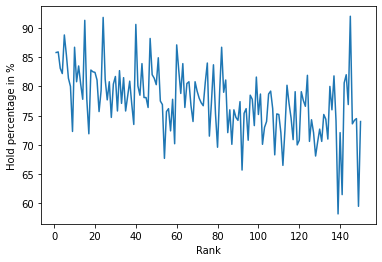

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
rank=finalldf['Rank']###uděláme graf, který ukazuje závislost mezi rankingem a pravděpodobností udržení servisu daného hráče
hold=[float(finallist[i][2].replace("%","")) for i in range(len(finallist))]
plt.plot(rank,hold)
plt.xlabel('Rank')
plt.ylabel('Hold percentage in %')
plt.show()

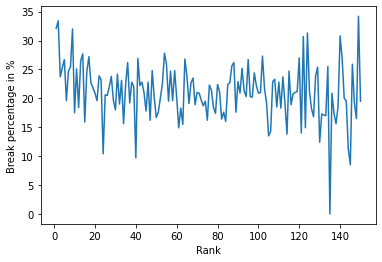

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
rank=finalldf['Rank']###uděláme graf, který ukazuje závislost mezi rankingem a pravděpodobností breaknutí servisu soupeře
breaky=[float(finallist[i][3].replace("%","")) for i in range(len(finallist))]
plt.plot(rank,breaky)
plt.xlabel('Rank')
plt.ylabel('Break percentage in %')
plt.show()

In [33]:
for i in range(len(Names)):###pomocný dataframe, který nám pomáhá při hledání hráče u tenisové tří dy tenisový hráč    
    finalldf.rename(columns={},index={i:finalldf.at[i,"Name"]},inplace=True)
   
print(finalldf)

                                                    Name  Rank   Hld%   Brk%
Novak Djokovic                            Novak Djokovic     1  85.8%  32.1%
Rafael Nadal                                Rafael Nadal     2  85.9%  33.4%
Dominic Thiem                              Dominic Thiem     3  83.1%  23.7%
Daniil Medvedev                          Daniil Medvedev     4  82.2%  25.3%
Roger Federer                              Roger Federer     5  88.8%  26.7%
Stefanos Tsitsipas                    Stefanos Tsitsipas     6  85.4%  19.6%
Alexander Zverev                        Alexander Zverev     7  81.4%  24.7%
Andrey Rublev                              Andrey Rublev     8  80.0%  25.3%
Diego Sebastian Schwartzman  Diego Sebastian Schwartzman     9  72.3%  31.9%
Matteo Berrettini                      Matteo Berrettini    10  86.6%  17.5%


In [34]:
class Tennisplayer:     ###definujeme si třídu tenisového hráče
    def __init__(self,name):
        self.name = name
        
    def ranking(self,name):
        return finalldf.at[name,"Rank"]
    def servis(self,name):
        return finalldf.at[name,"Hld%"]
    def returny(self,name):
        return finalldf.at[name,"Brk%"]

In [35]:
def nodata(vstup):           ###u některých hráčů nemáme data, a tak chceme ověřit že náš hráč je má
    if vstup=="No data":
        Entry.insert(E4,0,"No data")
        print("No data")
        Entry.insert(E5,0,"No data")
        print("No data")
        return None
    
def numerizace(vstup):      ###chceme to dostat do formátu čísla na výpočty, takže procento tam nechce
    return float(vstup[:-1])

def elo(vstup):             ###nadefinujeme si náš elo žebříček, aby se nemohlo stát, že hráč s vyšším rankingem
    if vstup>200:           ###nebude favoritem utkáním
        vstup+=30
    if vstup>80 and vstup<201:
        vstup+=25
    if vstup>50 and vstup<81:
        vstup+=21 
    if vstup>30 and vstup<51:
        vstup+=17 
    if vstup>16 and vstup<31:
        vstup+=13
    if vstup>8 and vstup<17:
        vstup+=10
    if vstup>2 and vstup<9:
        vstup+=7        
    if vstup>0 and vstup<3:
        vstup+=4
    return vstup 

def differ(B,C):          ###spočítáme přibližný rozdíl mezi pravděpodobnostmi na servisu podle jejich ela
    P1=C/(B+C)
    P2=B/(B+C)
    diffskill=P1-P2
    diffskill=diffskill if diffskill>0 else -diffskill
    diff=0
    mini=min(P1,P2)
    diff=0.4-(((2*mini)**0.7)*0.4)
    return diff

def parametrcalc(a,b,c,d,Surface,P1,P2,diff):   ###výpočet- vstupní hodnoty jsou jejich statistiky ze servisu, rankingu,
    avgserve=(a+b)/2                            ###returnu a povrchu na kterém hrají, ve výpočtu zavádíme parametry aby naše
    avgreturn=(c+d)/2                           ### zhruba odpovídaly realitě
    eqserve=avgserve/(avgserve+avgreturn)
    eqreturn=avgreturn/(avgserve+avgreturn)
    serpar=eqserve**0.7
    retpar=eqreturn**0.7
    PS1,PS2,PR1,PR2,K,L=0,0,0,0,0,0
    if P1>P2:
        PS1=eqserve+(diff*(retpar/(retpar+serpar)))
        PS2=eqserve-(diff*(serpar/(retpar+serpar)))
        PR1=1-PS2
        PR2=1-PS1
    else:
        PS1=eqserve-(diff*(serpar/(retpar+serpar)))
        PS2=eqserve+(diff*(retpar/(retpar+serpar)))
        PR1=1-PS2
        PR2=1-PS1        
  
    if Surface =="Clay":
        K=PS1
        L=PS2  
        PS1+=-(K)*(L/10)
        PS2+=-(K)*(L/10)
        PR1=1-PS2
        PR2=1-PS1
        result=[PS1,PS2,PR1,PR2]
        return result
    if Surface =="Hard":
        result=[PS1,PS2,PR1,PR2]
        return result
    if Surface=="Grass":
        K=PS1
        L=PS2                 
        PS1=K+((1-K)*(1/5))
        PS2=L+((1-L)*(1/5))
        PR1=1-PS2
        PR2=1-PS1
        result=[PS1,PS2,PR1,PR2]
        return result
    else:
        result=[PS1,PS2,PR1,PR2]
        return result    


In [36]:
#tři vstupy, výstupy pravděpodobnost výhry servisů(returnu)
import tkinter
from tkinter import *
from tkinter import messagebox
def proces():    ###používáme naše předdefinované funkce k celému procesu výpočtu
    Tennisplayer1,Tennisplayer2,Surface=Entry.get(E1),Entry.get(E2),Entry.get(E3)  ###naše vstupní hodnoty
    h1,h2=Tennisplayer(Tennisplayer1),Tennisplayer(Tennisplayer2)
    Tennisplayer1ranking,Tennisplayer2ranking=h1.ranking(Tennisplayer1),h2.ranking(Tennisplayer2)
    Tennisplayer1servis,Tennisplayer2servis=h1.servis(Tennisplayer1),h2.servis(Tennisplayer1)
    nodata(Tennisplayer1servis)
    nodata(Tennisplayer2servis)
    Tennisplayer1returny=h1.returny(Tennisplayer1) 
    Tennisplayer2returny=h2.returny(Tennisplayer2)
    nodata(Tennisplayer1returny)
    nodata(Tennisplayer2returny)
       
    Tennisplayer1servis=numerizace(Tennisplayer1servis)
    Tennisplayer2servis=numerizace(Tennisplayer2servis)
    Tennisplayer1returny=numerizace(Tennisplayer1returny)
    Tennisplayer2returny=numerizace(Tennisplayer2returny)
        
    B=elo(Tennisplayer1ranking)
    C=elo(Tennisplayer2ranking)
    P1=C/(B+C)
    P2=B/(B+C)
    diff=differ(B,C)
    
    result=parametrcalc(Tennisplayer1servis,Tennisplayer2servis,Tennisplayer1returny,Tennisplayer2returny,Surface,P1,P2,diff)
    
    Entry.insert(E4,0,result[0])  ###spočítali jsme výsledky a díky tomu máme naší odhadovanou pravděpodobnost na výhry
    Entry.insert(E5,0,result[1])  ### servisu při podání hráče proti jinmu hráči  
    
top = tkinter.Tk()                ###uděláme si takovou menší "aplikaci" na výpočet
L1 = Label(top, text="Tennis calculator",).grid(row=0,column=1)
L2 = Label(top, text="Tennis player 1",).grid(row=1,column=0)
L3 = Label(top, text="Tennis player 2",).grid(row=2,column=0)
L4 = Label(top, text="Surface",).grid(row=3,column=0)
L5 = Label(top, text="P(Player 1 wins his serve)",).grid(row=4,column=0)
L6 = Label(top, text="P(Player 2 wins his serve)",).grid(row=5,column=0)
E1 = Entry(top, bd =5)
E1.grid(row=1,column=1)
E2 = Entry(top, bd =5)
E2.grid(row=2,column=1)
E3 = Entry(top, bd =5)
E3.grid(row=3,column=1)
E4 = Entry(top, bd =5)
E4.grid(row=4,column=1)
E5 = Entry(top, bd =5)
E5.grid(row=5,column=1)
B=Button(top, text ="Submit",command = proces).grid(row=6,column=1,)

top.mainloop()

In [37]:
#tři vstupy, výstupy pravděpodobnost výhry zápasu s různým skóre
import tkinter
from tkinter import *
from tkinter import messagebox
import scipy.special
def proces():
    Tennisplayer1,Tennisplayer2,Surface=Entry.get(E1),Entry.get(E2),Entry.get(E3)
    h1,h2=Tennisplayer(Tennisplayer1),Tennisplayer(Tennisplayer2)
    Tennisplayer1ranking,Tennisplayer2ranking=h1.ranking(Tennisplayer1),h2.ranking(Tennisplayer2)
    Tennisplayer1servis,Tennisplayer2servis=h1.servis(Tennisplayer1),h2.servis(Tennisplayer1)
    nodata(Tennisplayer1servis)
    nodata(Tennisplayer2servis)
    Tennisplayer1returny=h1.returny(Tennisplayer1) 
    Tennisplayer2returny=h2.returny(Tennisplayer2)
    nodata(Tennisplayer1returny)
    nodata(Tennisplayer2returny)
       
    Tennisplayer1servis=numerizace(Tennisplayer1servis)
    Tennisplayer2servis=numerizace(Tennisplayer2servis)
    Tennisplayer1returny=numerizace(Tennisplayer1returny)
    Tennisplayer2returny=numerizace(Tennisplayer2returny)
        
    B=elo(Tennisplayer1ranking)
    C=elo(Tennisplayer2ranking)
    P1=C/(B+C)
    P2=B/(B+C)
    diff=differ(B,C)
    
    result=parametrcalc(Tennisplayer1servis,Tennisplayer2servis,Tennisplayer1returny,Tennisplayer2returny,Surface,P1,P2,diff)    
    
###z pravděpodobnosti servisu na pravděpodobnost setu
    PS1,PS2=result[0],result[1]
    G,H,J=0,0,0
    T1=0.5-((PS2-PS1)/2)
    T2=0.5+((PS2-PS1)/2)
    for k in range(0,6):       ###používáme binomickou větu a pomocí pravděpodobností na výhru gemu při podání počítáme
        serve1=(PS1**k)*((1-PS1)**((5-k)))*scipy.special.binom(5,k)  ###pravděpodobnost na výhru setu
        for y in range(0,6):
            serve2=(PS2**y)*((1-PS2)**int((5-y)))*scipy.special.binom(5,y)
            if k+(5-y)>5:
                G+=serve1*serve2
            if k+(5-y)<5:
                H+=serve1*serve2
            if k+(5-y)==5:
                J+=serve1*serve2   
            
    G+=J*PS1*((1-PS2))
    H+=J*PS2*((1-PS1))

    G+=(J*PS1*PS2*T1)+(J*(1-PS2)*(1-PS1)*T1)
    H+=(J*PS1*PS2*T2)+(J*(1-PS2)*(1-PS1)*T2)   ###projeli jsme všechny různé scénáře a přesně spořítali pravděpodobnost 
                                               ### za předpokladu, že víme pravdědobnosti na výhry gemu
    dvanula=G*G    ###jednoduchý výpočet, z pravděpodobnosti výhry setu uděláme pravděpodobnosti na výhru v zápase
    dvajedna=G*H*2*G
    jednadva=G*H*2*H
    nuladva=H*H
    
    Entry.insert(E4,0,dvanula)
    Entry.insert(E5,0,dvajedna)
    Entry.insert(E6,0,jednadva)
    Entry.insert(E7,0,nuladva)        
    
top = tkinter.Tk()
L1 = Label(top, text="Tennis calculator",).grid(row=0,column=1)
L2 = Label(top, text="Tennis player 1",).grid(row=1,column=0)
L3 = Label(top, text="Tennis player 2",).grid(row=2,column=0)
L4 = Label(top, text="Surface",).grid(row=3,column=0)
L5 = Label(top, text="P(Player 1 wins 2:0)",).grid(row=4,column=0)
L6 = Label(top, text="P(Player 1 wins 2:1)",).grid(row=5,column=0)
L7 = Label(top, text="P(Player 2 wins 2:0)",).grid(row=6,column=0)
L8 = Label(top, text="P(Player 2 wins 2:1)",).grid(row=7,column=0)
E1 = Entry(top, bd =5)
E1.grid(row=1,column=1)
E2 = Entry(top, bd =5)
E2.grid(row=2,column=1)
E3 = Entry(top, bd =5)
E3.grid(row=3,column=1)
E4 = Entry(top, bd =5)
E4.grid(row=4,column=1)
E5 = Entry(top, bd =5)
E5.grid(row=5,column=1)
E6 = Entry(top, bd =5)
E6.grid(row=6,column=1)
E7 = Entry(top, bd =5)
E7.grid(row=7,column=1)
B=Button(top, text ="Submit",command = proces).grid(row=8,column=1,)

top.mainloop()